# Benchmark study on single sample gene set analysis tools

#### Contributor: Antonio Mora, Chengshu Xie 
#### Date of first version: 2019-01-20
#### Date of last review: 2020-05-26 
#### Summary:
This is a workflow to compare 6 single sample gene set analysis methods(PLAGE, ZSCORE, SSGSEA, GSVA, GRAPE, Pathifier) through the slected real benchmark datasets. Here are the 8 data sets about respiratory disease from GEO database, which are available in [GitHub](https://github.com/mora-lab/benchmarks/tree/master/single-sample/data):

* [GSE10245 : Non-Small Cells Lung Cancer](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10245)
* [GSE11906 : Chronic Obstructive Pulmanory Disease](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE11906)
* [GSE18842 : Non-Small Cells Lung Cancer](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE18842)
* [GSE35571 : Asthma](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE35571)
* [GSE42057 : Chronic Obstructive Pulmanory Disease](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE42057)
* [GSE50834 : Tuberculosis](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE50834)
* [GSE52819 : Tuberculosis](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52819)
* [GSE67472 : Asthma](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE67472)

#### Contents:
* [1. Data Preparation](#link1)
    * [1.1 Prerequisites](#link2)
    * [1.2 Download and manage data](#link3) 
* [2. Method application](#link4)
    * [2.1 PLAGE,ZSCORE,SSGSEA and GSVA](#link5)
    * [2.2 Pathifier](#link6)
    * [2.3 GRAPE](#link7)
    * [2.4 Combination of P-value](#link8)
* [3. Calculation of sensitivity, specificity, and precision](#link9) 
* [4. Boxplots](#link10)




## <a id=link1>1. Data Preparation</a>

### <a id=link2>1.1 Prerequisites</a>

Install and library packages in need:

In [1]:
##################################################################################
########################## Install and Library Packages ##########################
##################################################################################
installed <- installed.packages()[,"Package"]
packages.required = c("GEOquery", "tidyverse", "GRAPE", "GSVAdata", "pathifier",
                      "GSEABase","GSVA", "limma", "metap", "ggplot2",
                      "R.utils", "ggpubr", "reshape2","stringr")

for (package in packages.required){
    if (!(package %in% installed)) {
     #install.packages(package)
     if (!requireNamespace("BiocManager", quietly = TRUE))
         install.packages("BiocManager")
     
     BiocManager::install(package, update = FALSE)
  }
}

suppressPackageStartupMessages(library(R.utils))
suppressPackageStartupMessages(library(GEOquery))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(pathifier))
suppressPackageStartupMessages(library(GRAPE))
suppressPackageStartupMessages(library(GSVAdata))
suppressPackageStartupMessages(library(GSEABase))
suppressPackageStartupMessages(library(GSVA))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(metap))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(stringr))

In [ ]:
##################################################################################
############################## R functions in need ###############################
##################################################################################
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/get_microarray_data.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/format_input_pathifier.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/read_gmt.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/run_gsva_4methods.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/run_GRAPE.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/run_pathifier.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/run_limma.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/comb_pval.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/SSP_calculation.R")
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/newSSPresult.R")

### <a id=link3>1.2 Download and manage data</a>

R package `GEOquery` is useful to download expression matrix and `tidyverse` is used to do data wrangling:

In [2]:
##################################################################
####################### prepare datasets #########################
##################################################################
### make sure of the R annotation packages about the datasets
##################################################################
GSE10245 = get_microarray_data(geo_accession = "GSE10245", 
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE10245_pdata.csv",
           GPL = "GPL570");
GSE11906 = get_microarray_data(geo_accession = "GSE11906",
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE11906_pdata.csv",
           GPL = "GPL570");
GSE18842 = get_microarray_data(geo_accession = "GSE18842",
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE18842_pdata.csv",
           GPL = "GPL570");
GSE35571 = get_microarray_data(geo_accession = "GSE35571", 
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE35571_pdata.csv",
           GPL = "GPL570");
GSE42057 = get_microarray_data(geo_accession = "GSE42057", 
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE42057_pdata.csv",
           GPL = "GPL570");
GSE50834 = get_microarray_data(geo_accession = "GSE50834",
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE50834_pdata.csv",
           GPL = "GPL10558");
GSE52819 = get_microarray_data(geo_accession = "GSE52819",
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE52819_pdata.csv",
           GPL = "GPL6244");
GSE67472 = get_microarray_data(geo_accession = "GSE67472",
           pdata_file = "git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/GSE67472_pdata.csv",
           GPL = "GPL16311");

GSEdata = list("GSE10245" = GSE10245, "GSE11906" = GSE11906,
               "GSE18842" = GSE18842, "GSE35571" = GSE35571,
               "GSE42057" = GSE42057, "GSE50834" = GSE50834,
               "GSE52819" = GSE52819, "GSE67472" = GSE67472);

In [3]:
##################################################################
############## prepare datasets used in pathifier ################
##################################################################
pathifier_input = lapply(GSEdata, format_input_pathifier);

In [4]:
##################################################################
##################### Reference pathways #########################
##################################################################
### make sure of the R annotation packages about the datasets
##################################################################
pathwaylist = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/c2.cp.kegg.v7.0.symbols.gmt");
target.Asthma = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/Asthma.target.pathway.symbols.gmt");
target.COPD = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/COPD.target.pathway.symbols.gmt");
target.NSCLC = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/NSCLC.target.pathway.symbols.gmt");
target.Tuber = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/Tuberclosis.target.pathway.symbols.gmt");

### used in GSVA
genesetcollection = getGmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/c2.cp.kegg.v7.0.symbols.gmt", 
                           geneIdType = EntrezIdentifier(), 
                           collectionType = BroadCollection(category="c2"));

### used in Pathifier
PATHWAYS = list();
PATHWAYS$gs = pathwaylist;
PATHWAYS$pathwaynames = as.list(names(pathwaylist));
names(PATHWAYS$pathwaynames) = names(pathwaylist);

## <a id=link4>2. Methods application</a>

### <a id=link5>2.1 PLAGE,ZSCORE,SSGSEA and GSVA</a>

Run the 4 methods using `run_gsva_4methods` and change the formats of the results : 

In [5]:
### results of PLAGE,ZSCORE,SSGSEA and GSVA
gsva_4results = lapply(GSEdata, function(x) run_gsva_4methods(x, genesetcollection))
                       
### change the formats
adjust_str = function(resultlist){
  
  score.result = list();
  i = 1;
  for (j in 1:4){
    score.result[[j]] = list("GSE10245" = gsva_4results[[i]][[j]],
                             "GSE11906" = gsva_4results[[i+1]][[j]],
                             "GSE18842" = gsva_4results[[i+2]][[j]],
                             "GSE35571" = gsva_4results[[i+3]][[j]],
                             "GSE42057" = gsva_4results[[i+4]][[j]],
                             "GSE50834" = gsva_4results[[i+5]][[j]],
                             "GSE52819" = gsva_4results[[i+6]][[j]],
                             "GSE67472" = gsva_4results[[i+7]][[j]])
  }
  names(score.result) = c("result.plage", 
                          "result.zscore",
                          "result.ssgsea", 
                          "result.gsva")
  return(score.result)
}

newscore.result = adjust_str(gsva_4results)

### <a id=link6>2.2 Pathifier</a>

Using `run_pathifier()`:

In [6]:
### results of pathifier
pathifier_result = lapply(pathifier_input, function(x) run_pathifier(x, PATHWAYS));

### <a id=link7>2.3 GRAPE</a>

Using `run_GRAPE()`:

In [7]:
# result.GRAPE = lapply(GSEdata, function(x) run_GRAPE(x, pathwaylist))
result.GRAPE_GSE10245 = run_GRAPE(GSE10245, pathwaylist);
result.GRAPE_GSE11906 = run_GRAPE(GSE11906, pathwaylist);
result.GRAPE_GSE18842 = run_GRAPE(GSE18842, pathwaylist);
result.GRAPE_GSE35571 = run_GRAPE(GSE35571, pathwaylist);
result.GRAPE_GSE50834 = run_GRAPE(GSE50834, pathwaylist);
result.GRAPE_GSE52819 = run_GRAPE(GSE52819, pathwaylist);
result.GRAPE_GSE67472 = run_GRAPE(GSE67472, pathwaylist);

## not work
# result.GRAPE_GSE42057 = run_GRAPE(GSE42057, pathwaylist);

GRAPE_result = list("GSE10245" = result.GRAPE_GSE10245,
                    "GSE11906" = result.GRAPE_GSE11906,
                    "GSE18842" = result.GRAPE_GSE18842,
                    "GSE35571" = result.GRAPE_GSE35571,
                    "GSE50834" = result.GRAPE_GSE50834,
                    "GSE52819" = result.GRAPE_GSE52819,
                    "GSE67472" = result.GRAPE_GSE67472)

### <a id=link8>2.4 Combination of P-value</a>


Before combing the pvalues, using `limma` package to get all pvalue of each pathway:

In [8]:
##################################################################
############### conversion of scores_into_pvalue ################
##################################################################
score.plage = newscore.result$result.plage;
score.gsva = newscore.result$result.gsva;
score.ssgsea = newscore.result$result.ssgsea;
score.zscore = newscore.result$result.zscore;
score.pathifier = pathifier_results
score.GRAPE = GRAPE_result

# PLAGE, ZSCORE, SSGSEA, GSVA
P.res.gsva = run_limma(score.gsva, GSEdata)
P.res.ssgsea = run_limma(score.ssgsea, GSEdata)
P.res.plage = run_limma(score.plage, GSEdata)
P.res.zscore = run_limma(score.zscore, GSEdata)

# pathifier
P.res.pathifier = run_limma(score.pathifier, GSEdata)
names(P.res.pathifier) = names(P.res.gsva) = names(P.res.plage) = names(P.res.ssgsea) = names(P.res.zscore) = names(GSEdata)

# GRAPE
g.GSE = list(GSEdata[[1]],GSEdata[[2]],GSEdata[[3]],GSEdata[[4]],
             GSEdata[[6]],GSEdata[[7]], GSEdata[[8]])
names(g.GSE) = c("GSE10245", "GSE11906", "GSE18842", "GSE35571",
                 "GSE50834", "GSE52819", "GSE67472")
P.res.GRAPE = run_limma(score.GRAPE, g.GSE)
names(P.res.GRAPE) = names(g.GSE)
P.res.GRAPE = list("GSE10245" = P.res.GRAPE$GSE10245,
                   "GSE11906" = P.res.GRAPE$GSE11906,
                   "GSE18842" = P.res.GRAPE$GSE18842,
                   "GSE35571" = P.res.GRAPE$GSE35571,
                   "GSE42057" = c(),
                   "GSE50834" = P.res.GRAPE$GSE50834,
                   "GSE52819" = P.res.GRAPE$GSE52819,
                   "GSE67472" = P.res.GRAPE$GSE67472)

In [9]:
### change the formats of all results
P.res = c()
for (i in c(1:4, 7:8)){
  P.res[[i]] = cbind(P.res.gsva[[i]], P.res.ssgsea[[i]], 
                     P.res.plage[[i]], P.res.zscore[[i]], 
                     P.res.pathifier[[i]], P.res.GRAPE[[i]])

  colnames(P.res[[i]]) = c("GSVA", "SSGSEA", "PLAGE", "ZSCORE", "PATHIFIER", "GRAPE")
  rownames(P.res[[i]]) = rownames(P.res.gsva[[i]])
}
names(P.res) = names(GSEdata)

In [10]:
### have a look at the "P.res" object
head(P.res[[1]])

,GSVA,SSGSEA,PLAGE,ZSCORE,PATHIFIER,GRAPE
KEGG_ABC_TRANSPORTERS,0.1478027,0.31407648,9.437269e-01,0.46573509,6.302940e-12,2.952325e-04
KEGG_ACUTE_MYELOID_LEUKEMIA,0.5117108,0.08246265,3.592973e-07,0.74184071,3.808734e-09,1.660432e-06
KEGG_ADHERENS_JUNCTION,0.8306032,0.06077015,2.188394e-10,0.89299786,2.392090e-08,1.341220e-10
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.2446430,0.02329440,3.542509e-03,0.05508469,1.051029e-04,8.779104e-05
KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.7535867,0.49284935,4.050375e-06,0.62769875,2.186887e-09,3.311847e-02
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,0.4350288,0.01246702,4.304272e-08,0.15405608,3.385644e-12,3.118776e-01


In [11]:
##################################################################
##################### combination of pvalue ######################
##################################################################
t = P.res[-c(5:6)]  ## the data in index 5 and 6 are null
comb_pvals = lapply(t, function(x) comb_pval(x, method = "sumlog"))

### have a look at the "comb_pvals"
head(comb_pvals$GSE10245)
                    
### new data frame of all p-value results
nP.res = list()
nP.res$GSE10245 = cbind(P.res$GSE10245, comb_pvals$GSE10245)
nP.res$GSE11906 = cbind(P.res$GSE11906, comb_pvals$GSE11906)
nP.res$GSE18842 = cbind(P.res$GSE18842, comb_pvals$GSE18842)
nP.res$GSE35571 = cbind(P.res$GSE35571, comb_pvals$GSE35571)
nP.res$GSE52819 = cbind(P.res$GSE52819, comb_pvals$GSE52819)
nP.res$GSE67472 = cbind(P.res$GSE67472, comb_pvals$GSE67472)
# comb_pvals = lapply(P.res[1:4], comb_pval)

,Comb.Pval
,<dbl>
KEGG_ABC_TRANSPORTERS,2.805218e-11
KEGG_ACUTE_MYELOID_LEUKEMIA,2.261772e-16
KEGG_ADHERENS_JUNCTION,3.469616e-22
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,3.487811e-09
KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,4.682347e-11
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,1.282027e-16


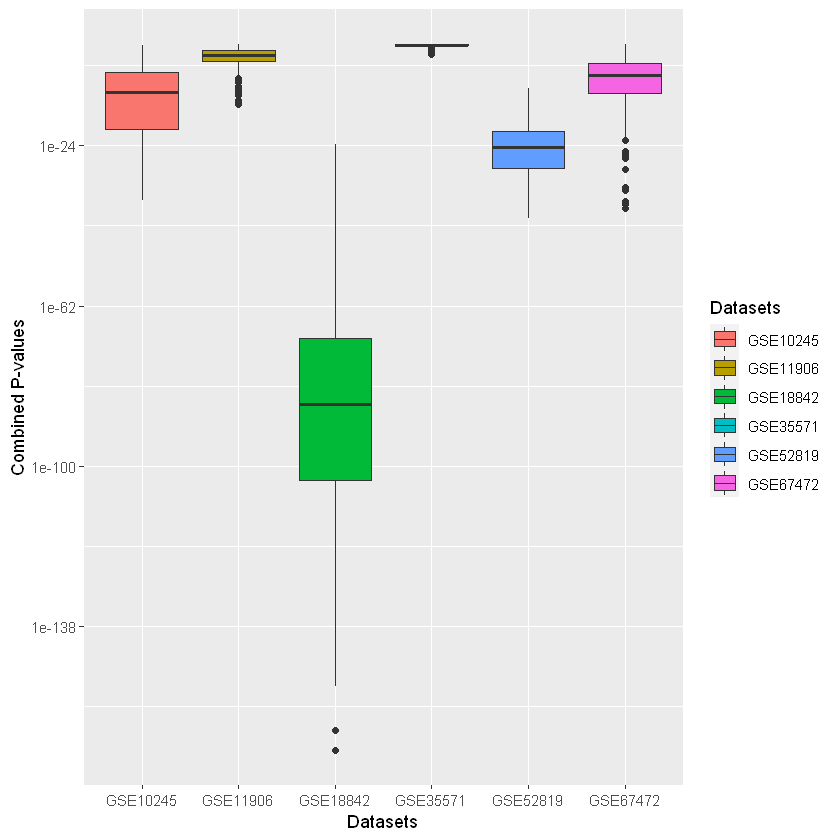

In [12]:
##################################################################
############### boxplot of the combined pvalues ##################
##################################################################
library(tidyr)
t.data = as.data.frame(comb_pvals)
colnames(t.data) = names(GSEdata)[-c(5:6)]
t.data$Pathway = rownames(t.data)
t.data = gather(t.data, key = "Datasets", value = "data", -Pathway)
ggplot(t.data, aes(Datasets,data, fill= Datasets))+
  geom_boxplot() +
  ylab("Combined P-values") +
  scale_y_continuous(trans="log10")

## <a id=link9>3. Calculation of sensitivity, specificity, and precision</a> 

Using `SSP_calculation()` to compute the value of sensitivity, specificity, and precision, and using `newSSPresult()` to change the frame:

In [13]:
GSE10245_NSCLC = SSP_calculation(nP.res$GSE10245, target.NSCLC)
nGSE10245_NSCLC = newSSPresult(GSE10245_NSCLC)
nGSE10245_NSCLC$Datasets = "GSE10245_NSCLC"
GSE18842_NSCLC = SSP_calculation(nP.res$GSE18842, target.NSCLC)
nGSE18842_NSCLC = newSSPresult(GSE18842_NSCLC)
nGSE18842_NSCLC$Datasets = "GSE18842_NSCLC"
GSE11906_COPD = SSP_calculation(nP.res$GSE11906, target.COPD)
nGSE11906_COPD = newSSPresult(GSE11906_COPD)
nGSE11906_COPD$Datasets = "GSE11906_COPD"
GSE35571_Asthma = SSP_calculation(nP.res$GSE35571, target.Asthma)
nGSE35571_Asthma = newSSPresult(GSE35571_Asthma)
nGSE35571_Asthma$Datasets = "GSE35571_Asthma"
GSE52819_Tuber = SSP_calculation(nP.res$GSE52819, target.Tuber)
nGSE52819_Tuber = newSSPresult(GSE52819_Tuber)
nGSE52819_Tuber$Datasets = "GSE52819_Tuber"
GSE67472_Asthma = SSP_calculation(nP.res$GSE67472, target.Asthma)
nGSE67472_Asthma = newSSPresult(GSE67472_Asthma)
nGSE67472_Asthma$Datasets = "GSE67472_Asthma"

SSP = rbind(nGSE10245_NSCLC,
            nGSE18842_NSCLC,
            nGSE11906_COPD,
            nGSE35571_Asthma,
            nGSE52819_Tuber,
            nGSE67472_Asthma)

In [14]:
head(SSP)

,Methods,Sensitivity,Specificity,Precision,Datasets
,<fct>,<dbl>,<dbl>,<dbl>,<chr>
GSVA,GSVA,0.3333333,0.71505376,0.03636364,GSE10245_NSCLC
SSGSEA,SSGSEA,0.3333333,0.57526882,0.02469136,GSE10245_NSCLC
PLAGE,PLAGE,0.8333333,0.25268817,0.03472222,GSE10245_NSCLC
ZSCORE,ZSCORE,0.3333333,0.69892473,0.03448276,GSE10245_NSCLC
PATHIFIER,PATHIFIER,1.0000000,0.02688172,0.03208556,GSE10245_NSCLC
GRAPE,GRAPE,1.0000000,0.27956989,0.04285714,GSE10245_NSCLC


## <a id=link10>4. Boxplots</a>

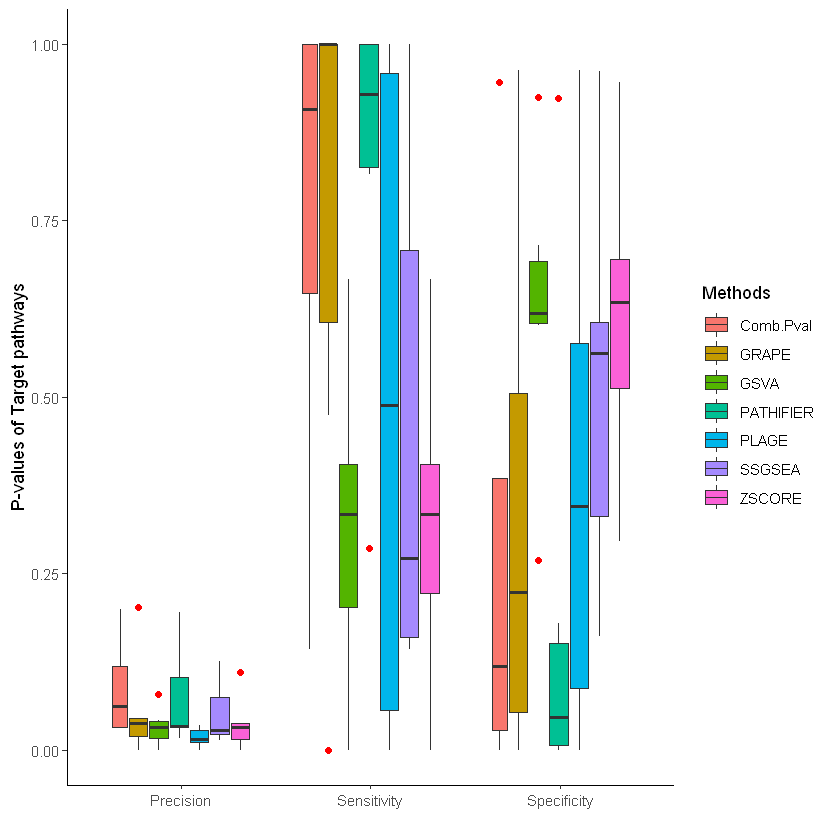

In [15]:
#### In one plot
tSSP = tidyr::gather(SSP,"Type", "Value", -c(Methods, Datasets))
ggplot(tSSP,aes(Type,Value,fill=Methods))+
  geom_boxplot(outlier.colour = "red", varwidth = TRUE)+
  xlab(" ")+
  theme_classic()+
  ylab("P-values of Target pathways") 

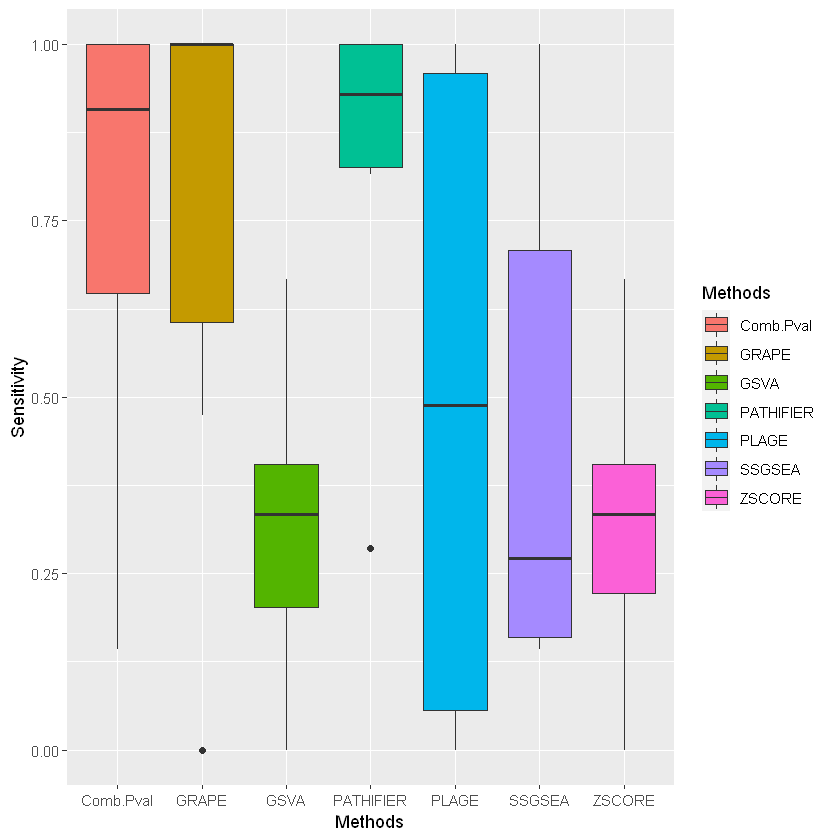

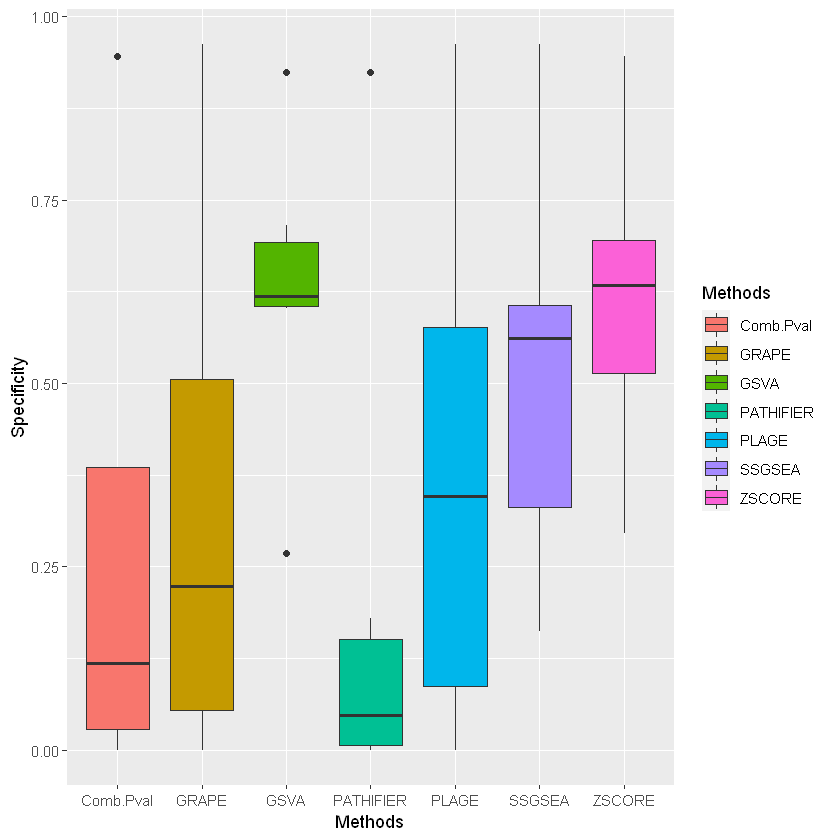

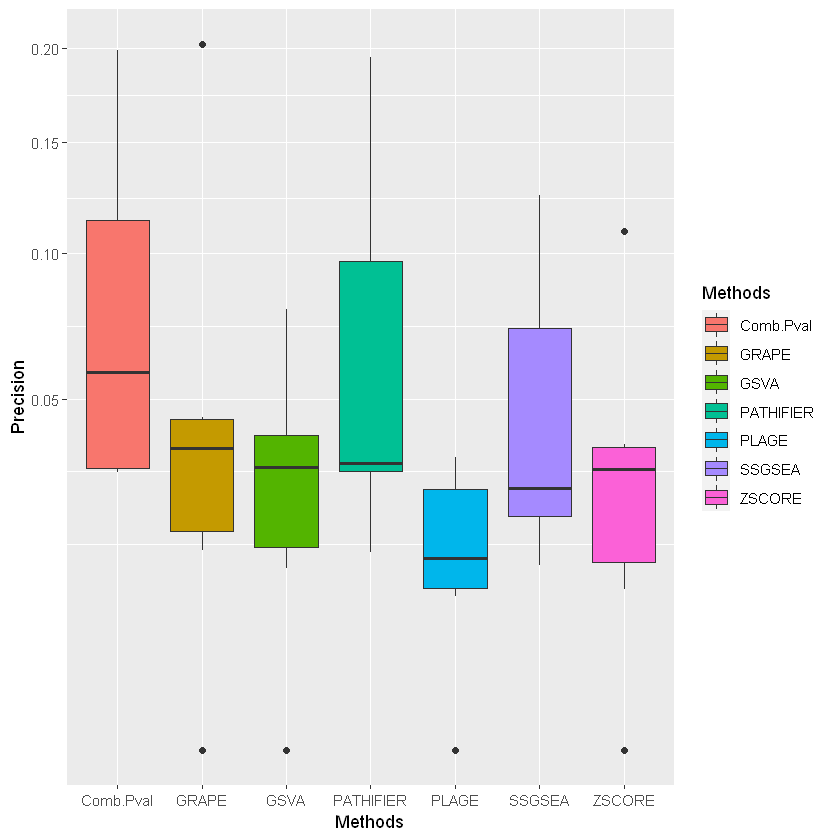

In [16]:
### In each single plot
senplot <- ggplot(SSP, aes(Methods, Sensitivity, fill = Methods))+
  geom_boxplot()+
  xlab("Methods")+
  ylab("Sensitivity") 
senplot
speplot <- ggplot(SSP, aes(Methods,Specificity, fill = Methods))+
  geom_boxplot()+
  xlab("Methods")+
  ylab("Specificity")
speplot
prelot <- ggplot(SSP, aes(Methods,Precision, fill = Methods))+
  geom_boxplot() +
  scale_y_sqrt()+
  xlab("Methods")+
  ylab("Precision") 
prelot

In [17]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] reshape2_1.4.4       ggpubr_0.3.0         metap_1.3           
 [4] limma_3.44.1         GSVA_1.36.0          GSVAdata_1.24.0     
 [7] hgu95a.db_3.2.3      org.Hs.eg.db_3.11.4  GSEABase_1.50.0     
[10] graph_1.66.0         annotate_1.66.0      XML_3.99-0.3        
[13] AnnotationDbi_1.50.0 IRanges_2.22.2       S4Vectors_0.26.1    
[16] GRAPE_0.1.1          pathifier_1.26.0     forcats_0.5.0       
[19] stringr_1.4.0        dplyr_0.8.5          purrr_0.3.4         
[22] readr